In [151]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plotSol(u, n):
    u = np.reshape(u, (n, n))
    
    X = np.arange(0, 1, 1 / n)
    Y = np.arange(0, 1, 1 / n)
    X, Y = np.meshgrid(X, Y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    surf = ax.plot_surface(X, Y, u, cmap=cm.hot)
    
    plt.show()

iter 0
0.09883467836818072
0.0
iter 1
0.00346998994344622
0.0
iter 2
0.0010181467004215122
0.0
iter 3
0.0004496252116573258
0.0
iter 4
0.0002071679980155698
0.0
iter 5
7.550251649654102e-05
0.0
iter 6
2.186100431479128e-05
0.0
iter 7
1.3604942922454357e-05
0.0
iter 8
8.706362990977096e-06
0.0
iter 9
3.4894190249583487e-06
0.0
iter 10
7.874954446059503e-07
iter 11
6.908037141134762e-07
iter 12
5.368614815519176e-07
iter 13
2.442814090141637e-07
iter 14
6.19598361988753e-08
iter 15
3.492878767652579e-08
iter 16
3.1496303116174136e-08
iter 17
1.607066252270633e-08
iter 18
4.68399060616699e-09
iter 19
1.7289065164023946e-09
iter 20
1.8087071381845234e-09
iter 21
1.0363338328487484e-09
iter 22
3.4870800094024593e-10
iter 23
9.046317197141459e-11
iter 24
1.0096901336278373e-10
iter 25
6.523502881146852e-11
iter 26
2.5013579408927735e-11
iter 27
5.584859001647424e-12
iter 28
5.433688253614717e-12
iter 29
3.999958792728893e-12


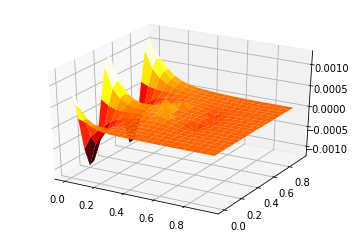

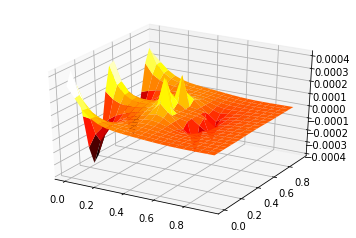

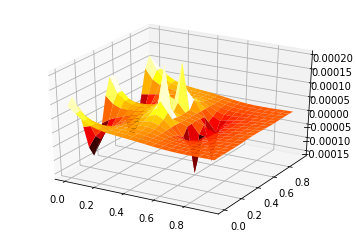

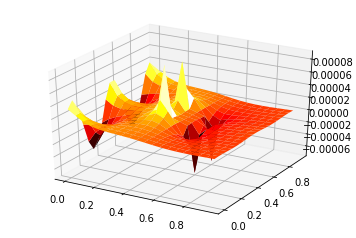

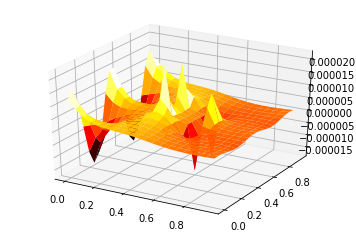

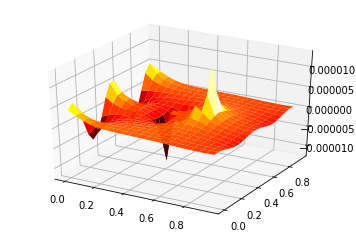

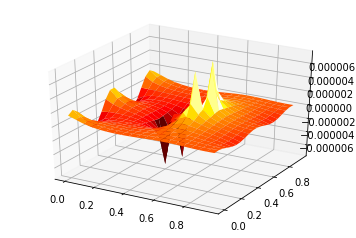

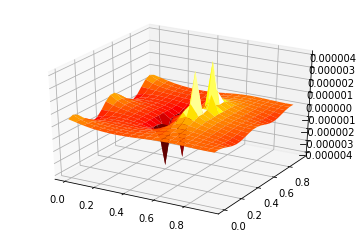

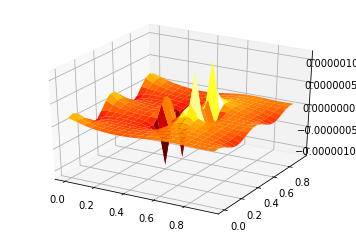

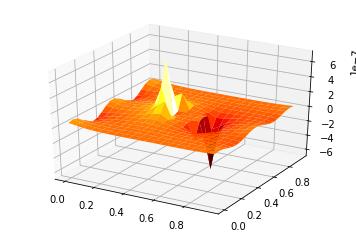

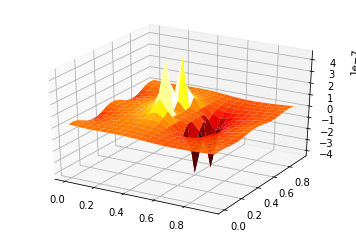

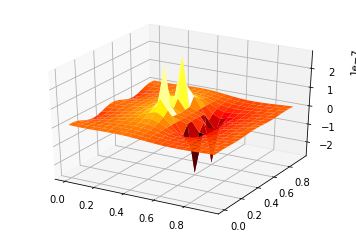

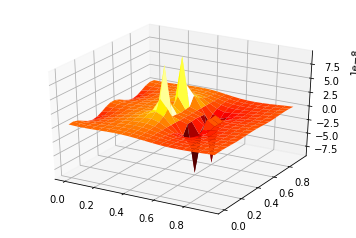

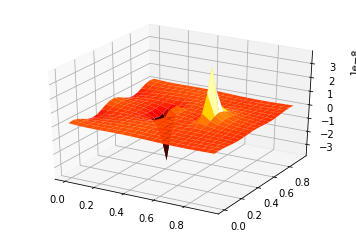

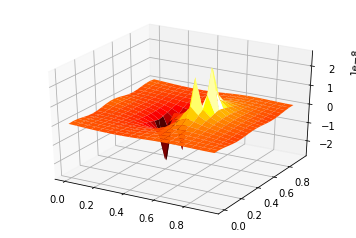

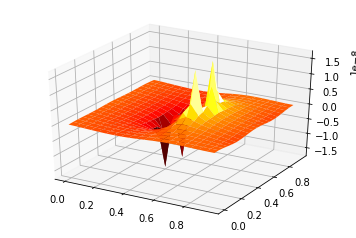

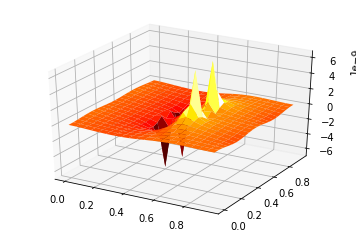

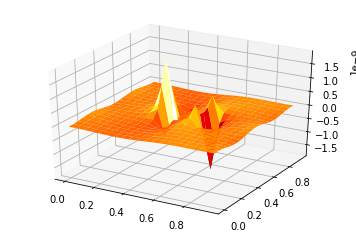

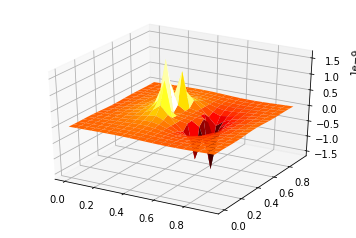

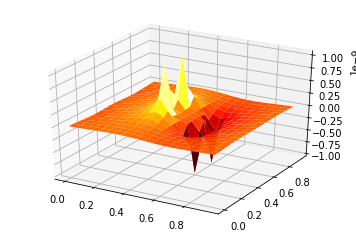

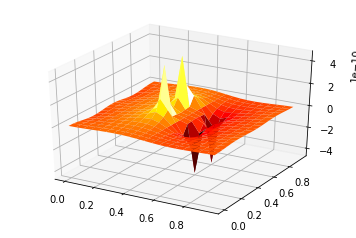

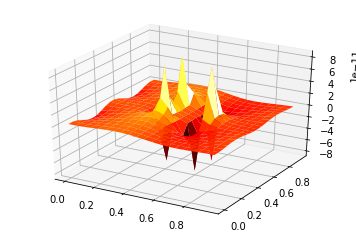

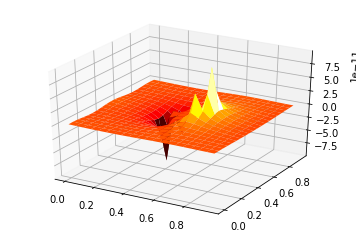

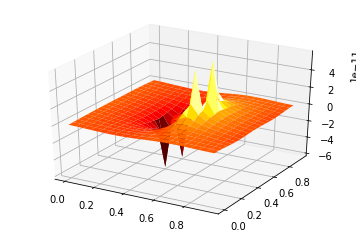

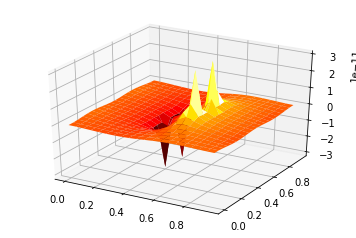

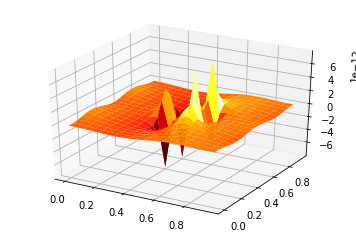

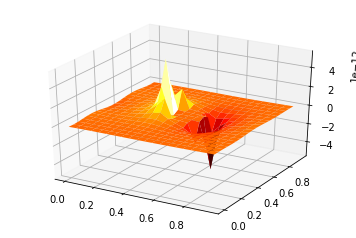

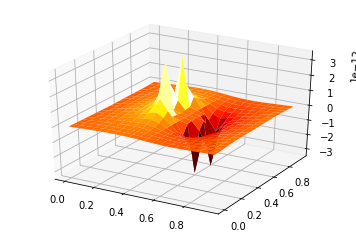

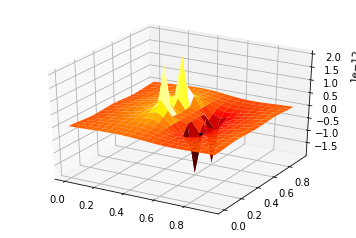

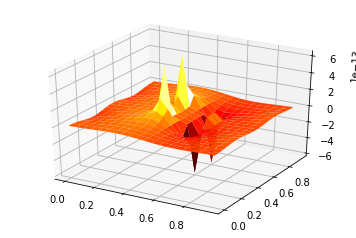

In [188]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
xc = [0.5, 0.5]

def g(x):
    if (x[0] > 1 or x[0] < 0 or x[1] > 1 or x[1] < 0) :
        return 0
    return 1 - 4*np.exp(-10*np.linalg.norm(np.subtract(x, xc)))

#i = y, j = x
def iStoC(i, j, dim):
        xcord = (j % dim) / dim
        ycord = (i // dim) / dim
        return (xcord, ycord)

#S[y][x]
def init_S(n, kappa):
    S = np.zeros((n*n, n*n))
    h = 1/n
    for i in range(n*n):
        gn = g(iStoC(i+1, i, n))
        ge = g(iStoC(i, i+1, n))
        gs = g(iStoC(i-1, i, n))
        gw = g(iStoC(i, i-1, n))
        if (i < n):
            if (i == 0):
                S[i][i] = -(ge+gn)/2-h*kappa
                S[i][i+1] = ge/2
                S[i][i+n] = gn/2
            elif(i == n - 1):
                S[i][i] = -(gw+gn)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i+n] = gn/2
            else:
                S[i][i] = -gn-(ge+gw)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i+1] = ge/2
                S[i][i+n] = gn
                
        if (i >= n*(n-1)):
            if (i % n == 0):
                S[i][i] = -(ge+gs)/2-h*kappa
                S[i][i+1] = ge/2
                S[i][i-n] = gs/2
            elif ((i + 1) % n == 0):
                S[i][i] = -(gw+gs)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i-n] = gs/2
            else:
                S[i][i] = -gs-(ge+gw)/2-h*kappa
                S[i][i-1] = gw/2
                S[i][i+1] = ge/2
                S[i][i-n] = gs
                
        if (n <= i < n*(n-1)):
            S[i][i-n] = gs
            S[i][i+n] = gn
            if (i % n == 0):
                S[i][i] = -ge-(gs+gn)/2-h*kappa
                S[i][i+1] = ge
            elif ((i + 1) % n == 0):
                S[i][i] = -gw -(gs+gn)/2-h*kappa
                S[i][i-1] = gw
            else:
                S[i][i] = -gn-ge-gs-gw
                S[i][i-1] = gw
                S[i][i+1] = ge
    return S

def init_M(dim):
    D = np.ones(dim)
    D[[0,-1]] = 0.5
    D = np.concatenate((0.5*D,np.tile(D,dim-2),0.5*D))
    M = np.diag(D)
    return ((1/dim)*(1/dim))*M

def init_u0(n):
    u = np.zeros((n*n, 1))
    for i in range(0, n*n):
        ycord = (i // n) / n
        xcord = (i % n) / n
        x = (xcord, ycord)
        if (np.linalg.norm(x) < 0.05):
            u[i] = 0.1
    return u

def backwardEuler(M, S, lam, dt, u0, epsilon, dimension, maxiter):
    Minv = np.linalg.inv(M)
    MinvS = Minv @ S
    ukn = ukn1 = u0
    sol = np.zeros((maxiter, dimension*dimension))
    for n in range(maxiter):
        print("iter", n)
        norm = np.inf
        while(norm > epsilon):
            uk1n1 = np.linalg.solve((np.eye(dimension*dimension) - dt*MinvS), (ukn + dt*lam*(ukn1 * (1-ukn1))))
            norm = np.linalg.norm(ukn1 - uk1n1)
            ukn1 = uk1n1
            print(norm)
        ukn = ukn1
        
        sol[n,:] = ukn[:,0]
    
    for i in range(maxiter):
        plotSol(sol[i], dimension)

#print(init_S(4, 1))
# plt.spy(init_S(6,1))
#plt.matshow(init_S(100,1))
dimension = 20
backwardEuler(init_M(dimension), init_S(dimension, 1), 0, 0.0001, init_u0(dimension), 1e-6, dimension, 30)
